<p align="left">
<img src="https://raw.githubusercontent.com/dewdotninja/exams/main/feng_heading_en.png" width=400 alt="Feng heading"/>
</p>

#### Homework 1 : 
<p />01205479 Internet of Things for Electrial Engineering
<p />Academic year 2022. First semester.


In [1]:
# import libraries you want to use
import numpy as np
import matplotlib.pyplot as plt

***
### List of Homework problems (total 10 points)

* [P1. (5 points)](#p1)
* [P2. (5 points)](#p2)


<a id="p1"></a>
#### P1. (5 points)
Figure 1 shows two MCUs with different supply voltages share a common input. Let the internal pull-up resistor for
MCU A equal $1000 \,\Omega$, and MCU B equal $2000 \,\Omega$
<p align="center">
<img src="https://drive.google.com/uc?id=1LOk7DQItga8zAJYe-9cfVRJlyGLuxmTd" width=550 alt="Figure 2"/>
</p>
<div align="center"><b>Figure 1 Two MCUs share a common input</b></div>
<ol>
<li />First assume no external pull-up resistor $R_X$. With SW1 open, compute the voltage $V_L$. (2 points) 
<li />Suppose that the maximum input voltage MCU B can tolerate is 3.5 volts. 
if $V_L$ computed from 1) exeeds 3.5 volts, choose $V_{CC}$ from either +5 or +3.3 volts to be used as pull-up voltage for $R_X$ and then 
compute $R_X$ to achieve $V_L = 3.5$ volts. Verify your result. (3 points)
</ol>

#### Solution

In [2]:
# internal resistor values
Ra = 1000
Rb = 2000

In [3]:
# 1. First assume no external pull-up resistor 𝑅x. With SW1 open, compute the voltage  𝑉l
# Note from KVL  5 = i*Ra + i*Rb + 3.3
# so first we need to find i
i = (5-3.3)/(Ra + Rb)
# then, 
Vl = i*Rb + 3.3
print("Vl = "+str(Vl)+"Volts")


Vl = 4.433333333333334Volts


In [4]:
# Since Vl> 3.5 volts, we must use external pullup
# select Vcc = 3.3 volts (selecting Vcc = 5 volts will increage Vl!)
Vcc = 3.3


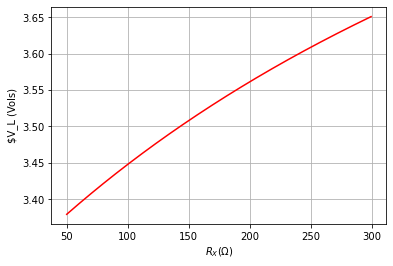

In [7]:
# 2. There is more than one way to do this part. For example, I can plot Vl v.s. Rx and choose the value that 
# gives Vl = 3.5
Rx = np.arange(50,300) # create Rx as a vector 
# compute Vl the same way as before, with Rb replace by Rx in parallel with Rb
Rx_p_Rb = Rx*Rb/(Rx+Rb)
i = (5-3.3)/(Ra+Rx_p_Rb)
Vl = i*Rx_p_Rb + 3.3
plt.figure()
plt.plot(Rx,Vl,'r-')
plt.xlabel("$R_X (\Omega)$")
plt.ylabel("$V_L (Volts)")
plt.grid(True)
plt.show()

From the plot, choose Rx < 140 Ohms

In [9]:
# verify
R_x = 140
R_x_p_Rb = R_x*Rb/(R_x+Rb)
il = (5-3.3)/(Ra+R_x_p_Rb)
V_l = il*R_x_p_Rb + 3.3
print("VL = "+str(round(V_l,2))+" volts")

VL = 3.5 volts


<a id="p2"></a>
#### P2. (5 points)

Figure 2 shows a method to use force sensing resistor. Let $R_S = 10000$ Ohms. 

<p align="center">
<img src="https://drive.google.com/uc?id=1fPtZG4Q-8tUR4MA_JiQPnq4yLn56Xb00" width=650 
alt="Figure 6"/>
</p>
<div align="center"><b>Figure 2 converting force to voltage</b></div>
<ol>
<li />Use the force -resistance chart on the right to derive a straight line equation 
mapping between the force and ADC voltage. You can assume that the resistance of FSR is
very high when force = 0 gram. (2 points)
<li />Plot the line with x-axis = ADC voltage and y-axis = force (3 points)
</ol>

#### Solution

1. Let's call FSR resitance $R_X$ and ADC voltage $V_S$
From the chart, $R_X$ is very high when F = 0 gram. Can assume that $R_X$ acts like an open circuit; i.e., $V_S = 0$.
$R_X = 1 K\Omega$ at F = 1000 grams.


So at $F = 0, V_S = 0$ (approximately) and at $F = 1000$ compute $V_S$

In [10]:
Rs = 10000
Rx = 1000 # at F = 1000
Vs = 3.3*Rs/(Rx+Rs)
Vs

3.0

Compute slope $m$ of a staight line $F = mV_S$ with x-axis = $V_S$ and y-axis = F.

In [11]:
m = 1000/3
m

333.3333333333333

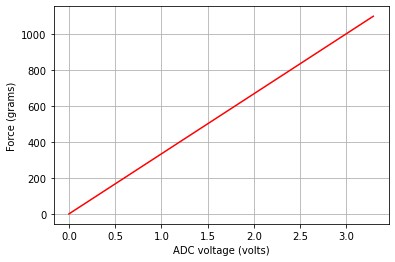

In [12]:
#2. plot the straingt line
vsvec = np.arange(0,3.3,0.01)  # ADC range
fvec = m*vsvec
plt.figure()
plt.plot(vsvec, fvec,'r-')
plt.xlabel('ADC voltage (volts)')
plt.ylabel('Force (grams)')
plt.grid(True)
plt.show()

##### Rev. 1A : August 2022